In [2]:
import pandas as pd
dataset=pd.read_csv("50_Startups.csv")
dataset=pd.get_dummies(dataset,drop_first=True).astype(int)
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [3]:
independent=dataset[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']]
dependent=dataset[['Profit']]

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)


In [42]:

list1=["squared_error", "friedman_mse","absolute_error", "poisson"]
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion="absolute_error",splitter='random',max_features='sqrt')
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score


0.761057262113424

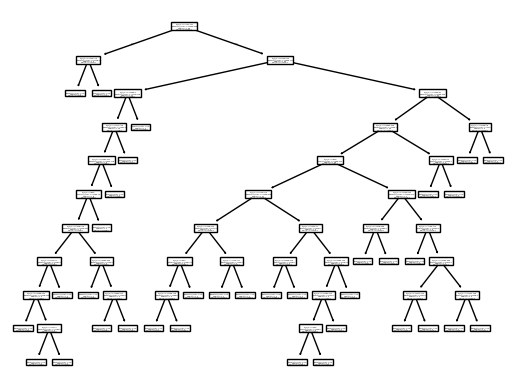

In [43]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [44]:
import pickle
filename="finalized_model.sav"
pickle.dump(regressor,open(filename,'wb'))
load_model=pickle.load(open(filename,'rb'))
load_model.predict([[123,456,654,1,0]])

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([89949.])